<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13095 entries, 0 to 13094
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        13095 non-null  int64  
 1   1.1      13095 non-null  int64  
 2   0.0023   13095 non-null  float64
 3   0.0003   13095 non-null  float64
 4   100.0    13095 non-null  float64
 5   518.67   13095 non-null  float64
 6   643.02   13095 non-null  float64
 7   1585.29  13095 non-null  float64
 8   1398.21  13095 non-null  float64
 9   14.62    13095 non-null  float64
 10  21.61    13095 non-null  float64
 11  553.90   13095 non-null  float64
 12  2388.04  13095 non-null  float64
 13  9050.17  13095 non-null  float64
 14  1.30     13095 non-null  float64
 15  47.20    13095 non-null  float64
 16  521.72   13095 non-null  float64
 17  2388.03  13095 non-null  float64
 18  8125.55  13095 non-null  float64
 19  8.4052   13095 non-null  float64
 20  0.03     13095 non-null  float64
 21  392      130

<ipython-input-1-e7286301463c>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rul_FD001_training = pd.read_csv('/Users/jubacochran/Downloads/AI_ML_UC_Berkeley/capstone/CMAPSSData/test_FD001.txt', delim_whitespace=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


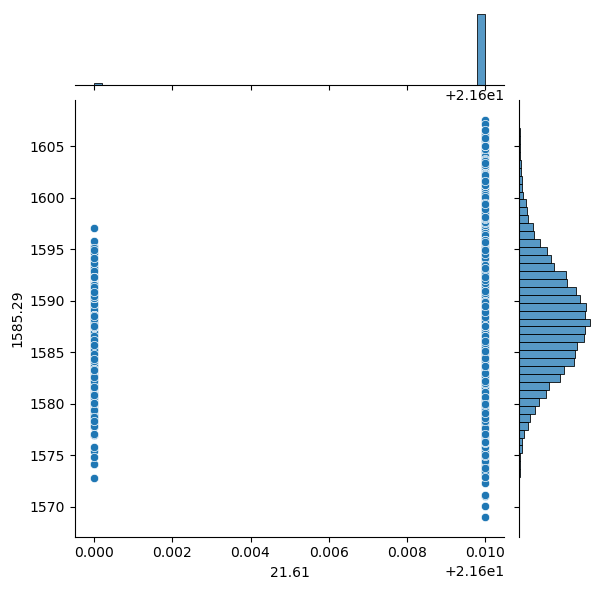

<bound method IndexOpsMixin.value_counts of 0        21.61
1        21.61
2        21.61
3        21.61
4        21.61
         ...  
13090    21.61
13091    21.61
13092    21.61
13093    21.61
13094    21.61
Name: 21.61, Length: 13095, dtype: float64>
[21.61 21.61 21.61 ... 21.61 21.61 21.61]
count    13095.000000
mean        21.609701
std          0.001704
min         21.600000
25%         21.610000
50%         21.610000
75%         21.610000
max         21.610000
Name: 21.61, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


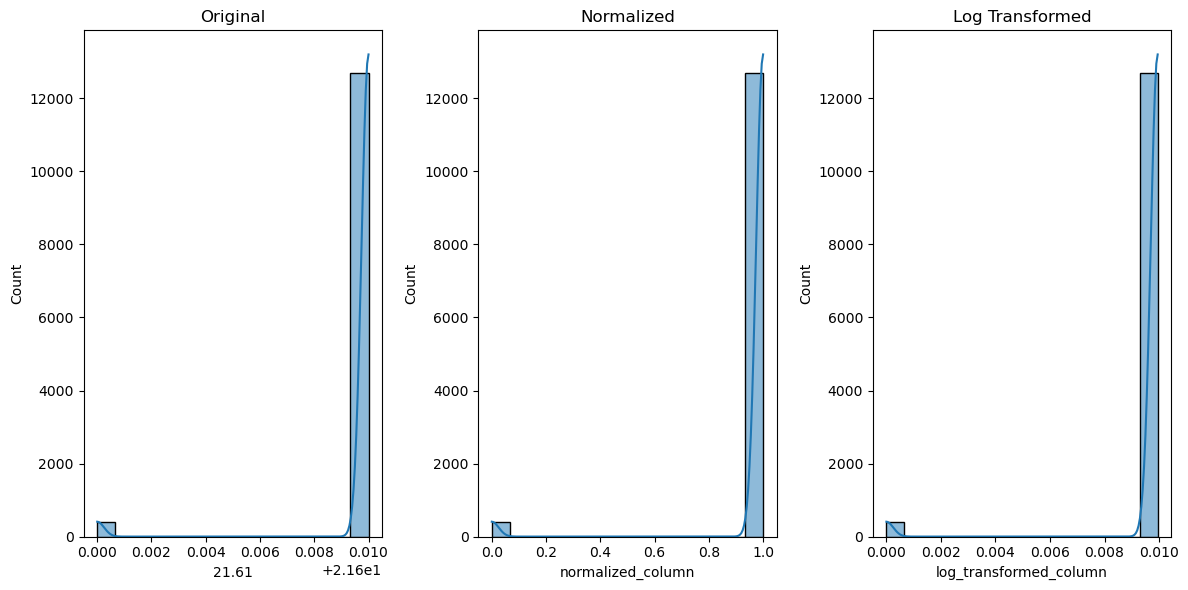

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, PowerTransformer,MinMaxScaler
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler



rul_FD001_training = pd.read_csv('/Users/jubacochran/Downloads/AI_ML_UC_Berkeley/capstone/CMAPSSData/test_FD001.txt', delim_whitespace=True)

print(rul_FD001_training.info())

#Exploring Sensor measurement 5: [Column '21.61'] #10
#Baseline Skew is -5.51755
print(rul_FD001_training['21.61'].skew())
print(rul_FD001_training['21.61'].var())
print(rul_FD001_training['21.61'].mean())
print(rul_FD001_training['21.61'].std())
# Create a joint plot Y is not skewed
'''
Feature, '21.61' is skewed by -5.5175579165987925
'''
sns.jointplot(
    x='21.61', 
    y='1585.29', 
    data=rul_FD001_training, 
    kind='scatter',  
    palette='Spectral',
    marginal_kws=dict(bins=50, fill=True)
)

plt.show()

print(rul_FD001_training['21.61'].value_counts)
print(rul_FD001_training['21.61'].values)
print(rul_FD001_training['21.61'].describe())

#skewed_column = '21.61'

# Normalization
scaler = MinMaxScaler()
rul_FD001_training['normalized_column'] = scaler.fit_transform(rul_FD001_training[['21.61']])

# Log Transformation
rul_FD001_training['log_transformed_column'] = np.log1p(rul_FD001_training['21.61'] - 21.6)

# IQR Method for Outliers
Q1 = rul_FD001_training['21.61'].quantile(0.25)
Q3 = rul_FD001_training['21.61'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

rul_FD001_training_filtered = rul_FD001_training[(rul_FD001_training['21.61'] >= lower_bound) & (rul_FD001_training['21.61'] <= upper_bound)]

# Plotting the distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(rul_FD001_training['21.61'], kde=True)
plt.title('Original')

plt.subplot(1, 3, 2)
sns.histplot(rul_FD001_training['normalized_column'], kde=True)
plt.title('Normalized')

plt.subplot(1, 3, 3)
sns.histplot(rul_FD001_training['log_transformed_column'], kde=True)
plt.title('Log Transformed')

plt.tight_layout()
plt.show()